 Dataset Loading and Exploration

In [63]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Print dataset shape
print(f"Training set shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set shape: {x_test.shape}, Labels: {y_test.shape}")


Training set shape: (50000, 32, 32, 3), Labels: (50000, 1)
Test set shape: (10000, 32, 32, 3), Labels: (10000, 1)


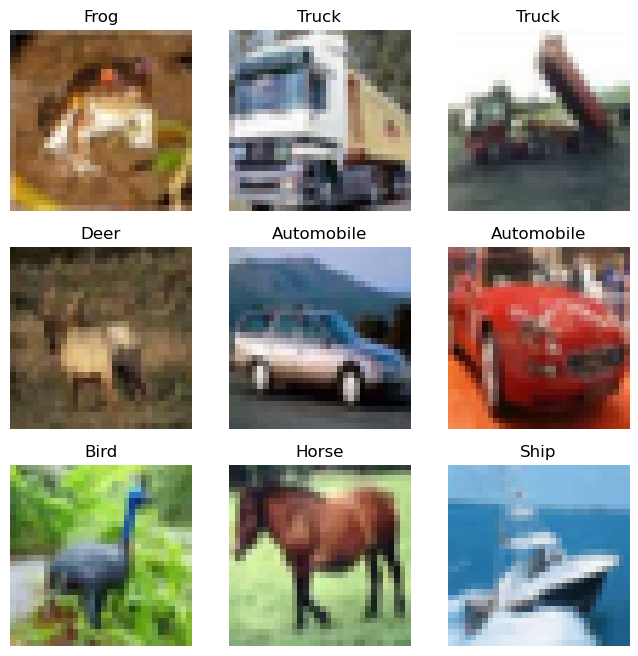

In [65]:

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot 9 random images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], interpolation='nearest')
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


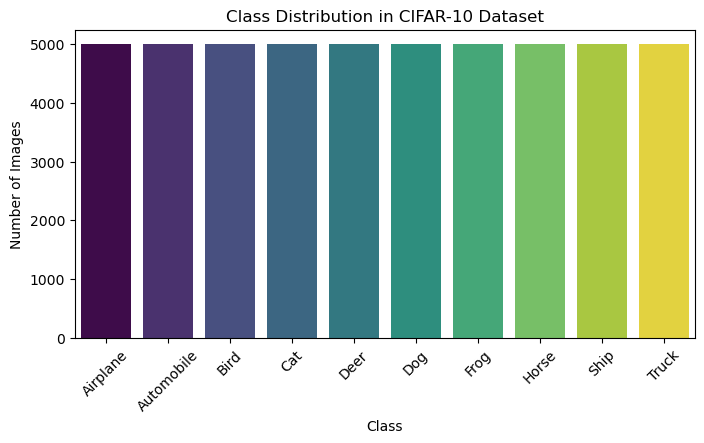

In [66]:
import seaborn as sns

# Convert labels into a 1D array
y_train_flat = y_train.flatten()

# Plot class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_flat, hue=y_train_flat, palette="viridis", legend=False)
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in CIFAR-10 Dataset")
plt.show()


In [67]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [68]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print shape after encoding
print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")


Shape of y_train after one-hot encoding: (50000, 10)
Shape of y_test after one-hot encoding: (10000, 10)


In [69]:
from sklearn.model_selection import train_test_split

# Split training data into 80% train and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print new dataset shapes
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation set: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")


Training set: (40000, 32, 32, 3), Labels: (40000, 10)
Validation set: (10000, 32, 32, 3), Labels: (10000, 10)
Test set: (10000, 32, 32, 3), Labels: (10000, 10)


In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [71]:
# Create an ImageDataGenerator with augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=15,        # Rotate images up to 15 degrees
    width_shift_range=0.1,    # Shift width by 10%
    height_shift_range=0.1,   # Shift height by 10%
    horizontal_flip=True,     # Flip images horizontally
    zoom_range=0.1            # Zoom in/out by 10%
)


In [72]:
# Fit the generator to training data
datagen.fit(x_train)


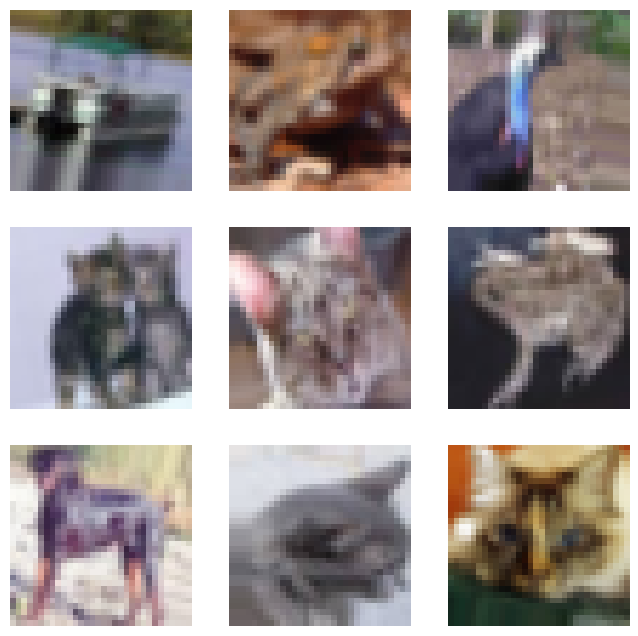

In [73]:
import matplotlib.pyplot as plt

# Generate augmented images
augmented_images = datagen.flow(x_train[:9], batch_size=9)

# Plot augmented images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[0][i])  # Display augmented image
    plt.axis("off")
plt.show()


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [75]:
from tensorflow.keras import Input

model = Sequential([
    # Explicitly define the input layer
    Input(shape=(32, 32, 3)),  

    # First Convolutional Layer
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),  
    MaxPooling2D(pool_size=(2,2)),  

    # Second Convolutional Layer
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),  
    MaxPooling2D(pool_size=(2,2)),  

    # Flatten Layer
    Flatten(),  

    # Fully Connected Dense Layer
    Dense(128, activation='relu'),  
    Dropout(0.5),  

    # Output Layer
    Dense(10, activation='softmax')  
])


In [76]:
model.compile(
    loss='categorical_crossentropy',  
    optimizer='adam',  
    metrics=['accuracy']  
)


In [77]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [79]:
# Define Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


In [80]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [81]:
history = model.fit(
    x_train, y_train, 
    batch_size=32,
    epochs=20, 
    validation_data=(x_val, y_val),  
    callbacks=[early_stopping, reduce_lr]  # Add callbacks
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.3079 - loss: 1.8668 - val_accuracy: 0.5073 - val_loss: 1.3845 - learning_rate: 0.0010
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5013 - loss: 1.3896 - val_accuracy: 0.5830 - val_loss: 1.1896 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.5638 - loss: 1.2243 - val_accuracy: 0.6297 - val_loss: 1.0651 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6021 - loss: 1.1247 - val_accuracy: 0.6330 - val_loss: 1.0400 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.6282 - loss: 1.0566 - val_accuracy: 0.6649 - val_loss: 0.9471 - learning_rate: 0.0010
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - accuracy: 0.6405 - loss: 1.0075 - val_accuracy: 0.6719 - val_loss: 0.9400 - learning_rate: 0.0010
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accura

In [82]:
model.save('cnn_model.keras', include_optimizer=False) 

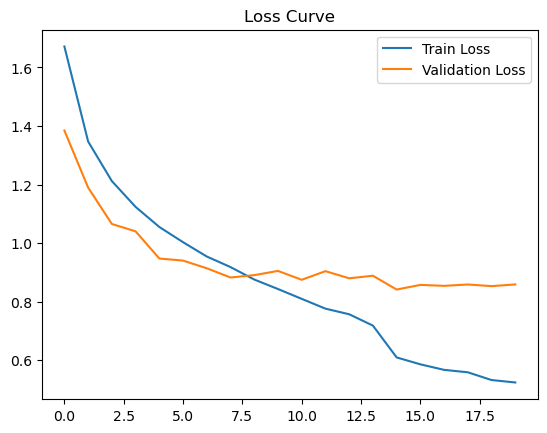

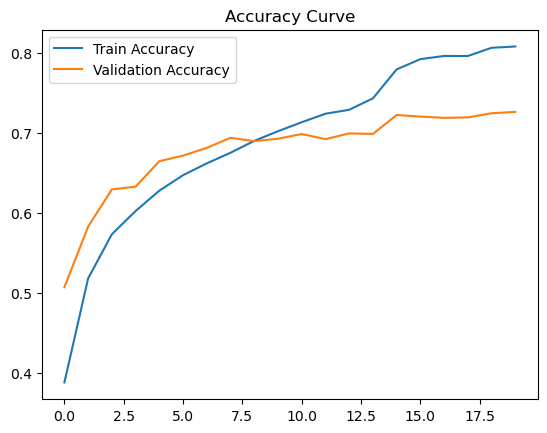

In [83]:
import matplotlib.pyplot as plt

# Plot training loss & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# Plot training accuracy & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


In [84]:
# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7201 - loss: 0.8452
Test Loss: 0.8598
Test Accuracy: 0.7156


In [85]:
import numpy as np

# Get model predictions
y_pred_probs = model.predict(x_test)  # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels back to class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [86]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1000
           1       0.84      0.83      0.83      1000
           2       0.63      0.57      0.60      1000
           3       0.53      0.52      0.53      1000
           4       0.65      0.66      0.65      1000
           5       0.60      0.64      0.62      1000
           6       0.76      0.80      0.78      1000
           7       0.75      0.77      0.76      1000
           8       0.83      0.82      0.83      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



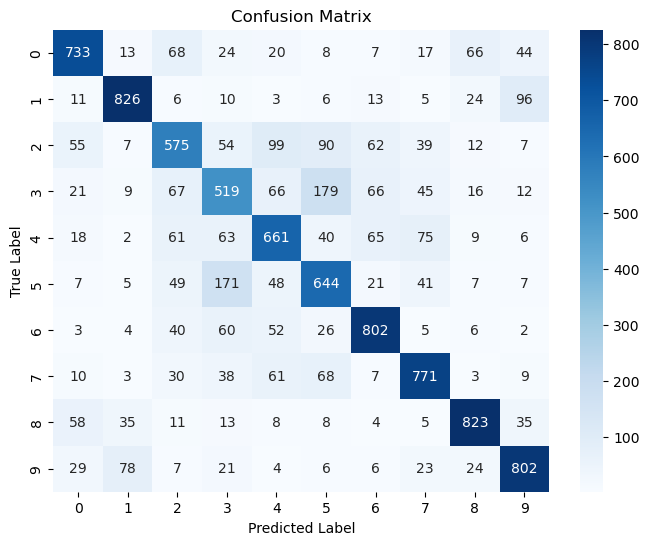

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


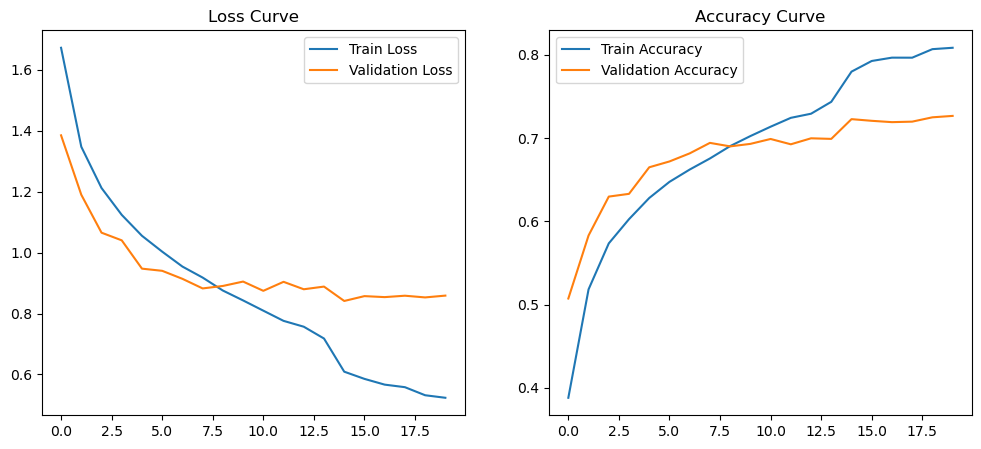

In [88]:
# Plot loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()


In [89]:
model.save("cnn_model_trained.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


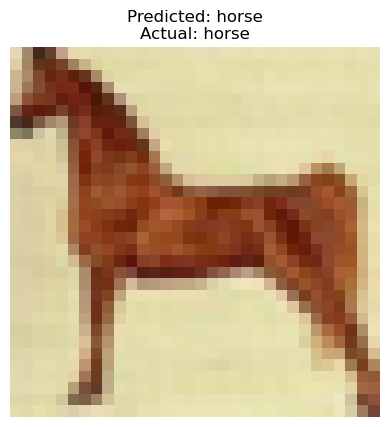

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = load_model("cnn_model.keras")  # Change the filename if needed

# Load CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (as done during training)
x_test = x_test.astype("float32") / 255.0  

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Select a random test image
index = np.random.randint(0, len(x_test))  # Pick a random index
image = x_test[index]  # Get the image
true_label = y_test[index][0]  # True label

# Expand dimensions for model prediction
image_input = np.expand_dims(image, axis=0)

# Make a prediction
predictions = model.predict(image_input)
predicted_label = np.argmax(predictions)  # Get the class with the highest probability

# Display the image with predicted and actual labels
plt.imshow(image)
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.axis("off")
plt.show()



In [ ]:
import sagemaker
from sagemaker.tensorflow import TensorFlowModel
from sagemaker.session import Session
import boto3

# Initialize SageMaker session and get bucket
tf_session = sagemaker.Session()
bucket = tf_session.default_bucket()
role = sagemaker.get_execution_role()

# Path to the trained model in S3 (Replace with your actual S3 path)
model_path = f"s3://{bucket}/model/cnn_model.keras"

# Load the trained model from S3
sagemaker_model = TensorFlowModel(
    model_data=model_path,
    role=role,
    framework_version="2.6",  # Adjust according to your TensorFlow version
    entry_point="inference.py",  # Custom script for inference logic
    py_version="py38"
)

# Deploy the model as an endpoint
predictor = sagemaker_model.deploy(
    initial_instance_count=1,
    instance_type="ml.m5.large"
)

# Print the endpoint URL
print(f"Model deployed at: {predictor.endpoint_name}")
